In [2]:
from IPython.display import HTML
file_path = 'homework3_part1_images/ex1_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [3]:
from IPython.display import HTML
file_path = 'homework3_part1_images/GD_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
def gradient_descent_fixalpha(f,grad_f,x0,kmax,tolf,tolx,alpha):

    if alpha <= 0:
        raise ValueError("Alpha must be greater than 0")
        
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.linalg.norm(grads[0])]

    for i in range(kmax):
        # Calculate the new point
        x_new = x[-1] - alpha * grads[-1]

        # Update the lists with new values
        x.append(x_new)
        f_val.append(f(x_new))
        grads.append(grad_f(x_new))
        err.append(np.linalg.norm(grad_f(x_new)))

        # Check the convergence conditions
        if (np.linalg.norm(grads[-1]) < tolf * np.linalg.norm(grads[0])) or (np.linalg.norm(x[-1] - x[-2]) < tolx * np.linalg.norm(x[0])):
            break
    
    return x, i, f_val, grads, err


In [6]:
def backtracking(f, grad_f, x):
    '''
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    '''
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha 

In [7]:
from IPython.display import HTML
file_path = 'homework3_part1_images/Back_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [8]:
def gradient_descent(f,grad_f,x0,kmax,tolf,tolx):
    
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.linalg.norm(grads[0])]

    for i in range(kmax):
        # Determine step size using backtracking
        alpha = backtracking(f,grad_f,x[-1])

        # Calculate the new point
        x_new = x[-1] - alpha * grads[-1]

        # Update the lists with new values
        x.append(x_new)
        f_val.append(f(x_new))
        grads.append(grad_f(x_new))
        err.append(np.linalg.norm(grad_f(x_new)))

        # Check the convergence conditions
        if (np.linalg.norm(grads[-1]) < tolf * np.linalg.norm(grads[0])) or (np.linalg.norm(x[-1] - x[-2]) < tolx * np.linalg.norm(x[0])):
            break
    
    return x, i, f_val, grads, err

In [9]:
from IPython.display import HTML
file_path = 'homework3_part1_images/test_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [10]:
from IPython.display import HTML
file_path = 'homework3_part1_images/requests_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

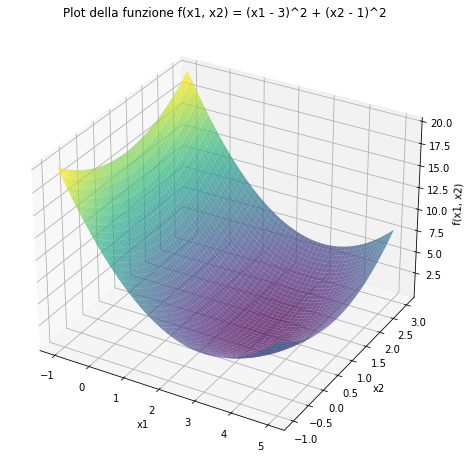

In [11]:
# 1 function

def f(x):
    x1,x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f(x):
    x1,x2 = x
    return np.array([2 * (x1 - 3), 2 * (x2 - 1)])


# Grid points x1, x2
x1 = np.linspace(-1, 5, 400) 
x2 = np.linspace(-1, 3, 400)   
x = [x1,x2]
x1, x2 = np.meshgrid(x1, x2) 

z = f(np.array([x1, x2]))

# plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis', alpha=0.7)  # Plotta la superficie

# Labels e title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Plot della funzione f(x1, x2) = (x1 - 3)^2 + (x2 - 1)^2')

plt.show()


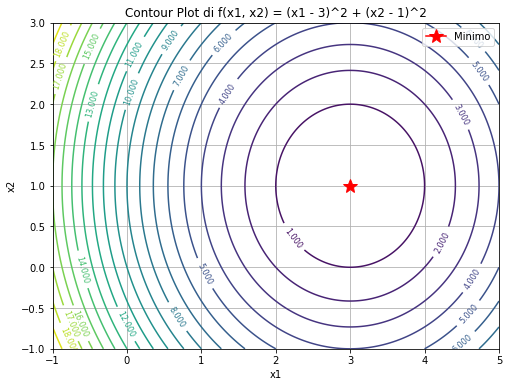

In [12]:
plt.figure(figsize=(8, 6))
contours = plt.contour(x1, x2, z, 20, cmap='viridis')  # 20 contours levels
plt.clabel(contours,fontsize=8)

# Etichette e titolo
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot di f(x1, x2) = (x1 - 3)^2 + (x2 - 1)^2')
plt.grid(True)

minimo_x1 = 3
minimo_x2 = 1
plt.plot(minimo_x1, minimo_x2, marker='*', color='red', markersize=15, label='Minimo')
plt.legend()


plt.show()


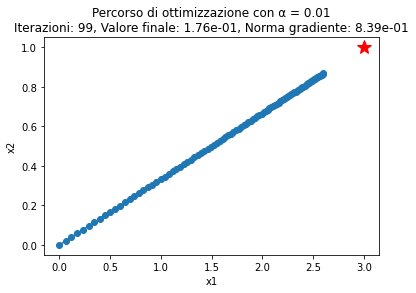

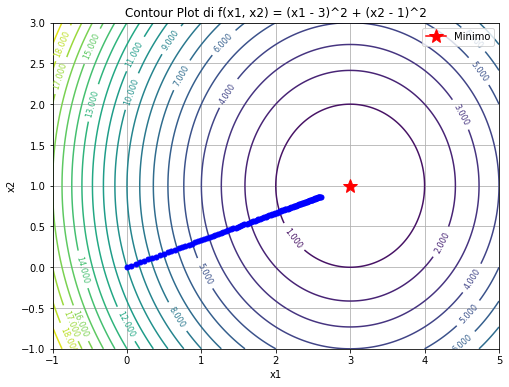

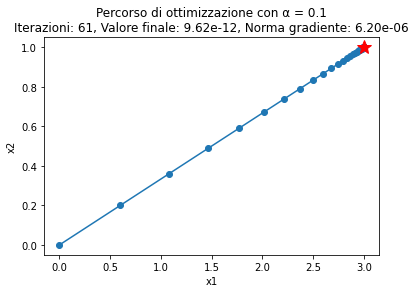

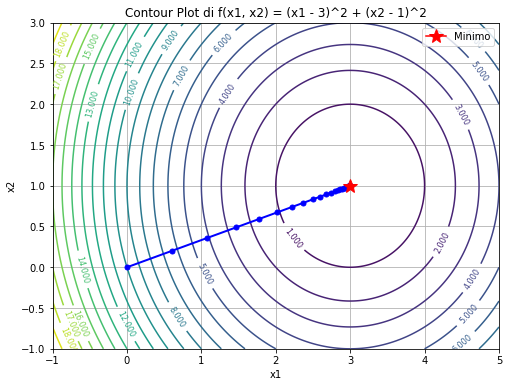

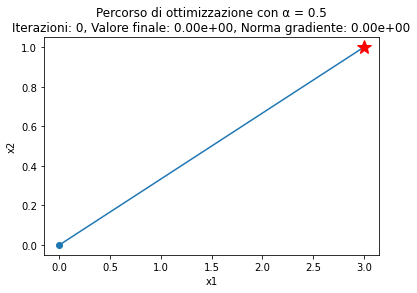

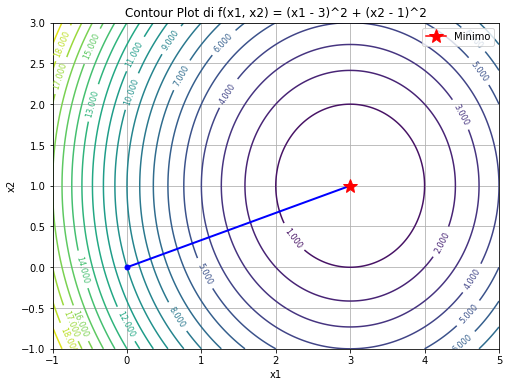

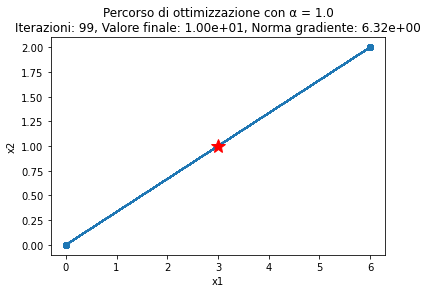

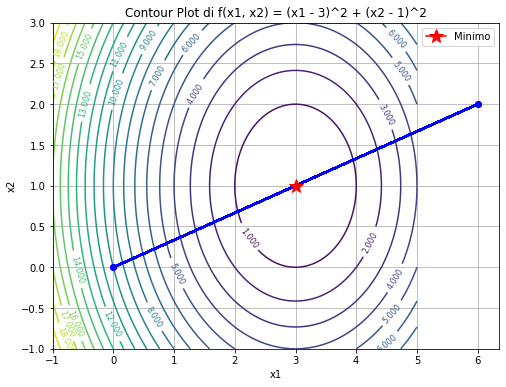

In [13]:
x0 = np.array([0.0, 0.0])  # Punto iniziale
kmax = 100  # Numero massimo di iterazioni
tolf = 1e-6  # Tolleranza sul gradiente
tolx = 1e-6  # Tolleranza sulla posizione
alphas = [0.01, 0.1, 0.5, 1.0]  # Some alpha values to test

results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(f, grad_f, x0, kmax, tolf, tolx, alpha)

# print(results_nobacktracking)


def plot_optimization_path(x_history, title, num_iterations, final_func_value, final_grad_norm):
    x_vals = [x[0] for x in x_history]
    y_vals = [x[1] for x in x_history]

    plt.plot(x_vals, y_vals, marker='o')
    plt.plot(3, 1, 'r*', markersize=15)  # Punto ottimale
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"{title}\nIterazioni: {num_iterations}, Valore finale: {final_func_value:.2e}, Norma gradiente: {final_grad_norm:.2e}")
    plt.show()


for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    final_point = path[-1]
    final_func_value = f_val[-1]
    final_grad_norm = np.linalg.norm(grads[-1])
    plot_optimization_path(path, f"Percorso di ottimizzazione con α = {alpha}", num_iterations, final_func_value, final_grad_norm)

    plt.figure(figsize=(8, 6))
    contours = plt.contour(x1, x2, z, 20, cmap='viridis')  # 20 contours levels
    plt.clabel(contours,fontsize=8)

    x1_path = [x[0] for x in path]
    x2_path = [x[1] for x in path]

    plt.plot(x1_path,x2_path,marker='o',color='blue',linestyle='-',linewidth=2, markersize=5)
    
    # Etichette e titolo
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot di f(x1, x2) = (x1 - 3)^2 + (x2 - 1)^2')
    plt.grid(True)

    minimo_x1 = 3
    minimo_x2 = 1
    plt.plot(minimo_x1, minimo_x2, marker='*', color='red', markersize=15, label='Minimo')
    plt.legend()


    plt.show()




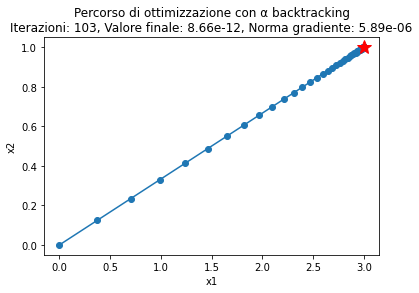

In [14]:
x0 = np.array([0.0, 0.0])  # Punto iniziale
kmax = 1000  # Numero massimo di iterazioni
tolf = 1e-6  # Tolleranza sul gradiente
tolx = 1e-6  # Tolleranza sulla posizione

path, num_iterations, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx)

#print(results_backtracking)


def plot_optimization_path(x_history, title, num_iterations, final_func_value, final_grad_norm):
    x_vals = [x[0] for x in x_history]
    y_vals = [x[1] for x in x_history]

    plt.plot(x_vals, y_vals, marker='o')
    plt.plot(3, 1, 'r*', markersize=15)  # Punto ottimale
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"{title}\nIterazioni: {num_iterations}, Valore finale: {final_func_value:.2e}, Norma gradiente: {final_grad_norm:.2e}")
    plt.show()


final_point = path[-1]
final_func_value = f_val[-1]
final_grad_norm = np.linalg.norm(grads[-1])
plot_optimization_path(path, f"Percorso di ottimizzazione con α backtracking", num_iterations, final_func_value, final_grad_norm)

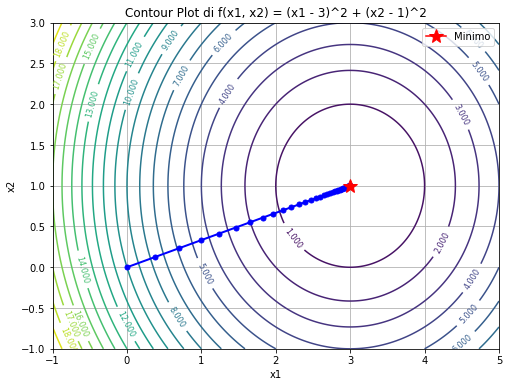

In [15]:
plt.figure(figsize=(8, 6))
contours = plt.contour(x1, x2, z, 20, cmap='viridis')  # 20 contours levels
plt.clabel(contours,fontsize=8)

x1_path = [x[0] for x in path]
x2_path = [x[1] for x in path]

plt.plot(x1_path,x2_path,marker='o',color='blue',linestyle='-',linewidth=2, markersize=5)


# Etichette e titolo
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot di f(x1, x2) = (x1 - 3)^2 + (x2 - 1)^2')
plt.grid(True)

minimo_x1 = 3
minimo_x2 = 1
plt.plot(minimo_x1, minimo_x2, marker='*', color='red', markersize=15, label='Minimo')
plt.legend()


plt.show()

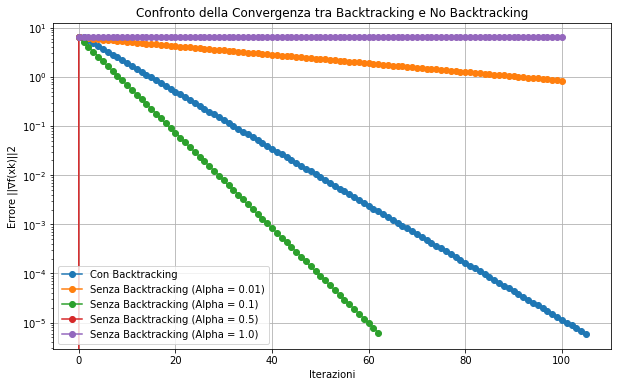

In [16]:
# Estrai i dati dai risultati con backtracking
path, num_iterations, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx)
k_backtracking = num_iterations
err_backtracking = err


# Estrai i dati dai risultati senza backtracking
k_nobacktracking = [results_nobacktracking[alpha][1] for alpha in alphas]
err_nobacktracking = [results_nobacktracking[alpha][-1] for alpha in alphas]

# Plotta l'errore in funzione delle iterazioni per entrambi i casi
plt.figure(figsize=(10, 6))
plt.semilogy(range(1,k_backtracking+3), err_backtracking, label='Con Backtracking', marker='o')
for alpha, error in zip(alphas, err_nobacktracking):
    plt.semilogy(range(len(error)), error, label=f'Senza Backtracking (Alpha = {alpha})', marker='o')

plt.xlabel('Iterazioni')
plt.ylabel('Errore ||∇f(xk)||2')
plt.title('Confronto della Convergenza tra Backtracking e No Backtracking')
plt.legend()
plt.grid()
plt.show()


tolf: 1e-06, tolx: 1e-06 -> Iterazioni: 99, Valore finale: 2.5212191920905437e-11, Cambiamento in x: 7.173106224132271e-07
tolf: 1e-06, tolx: 1e-08 -> Iterazioni: 99, Valore finale: 2.5212191920905437e-11, Cambiamento in x: 7.173106224132271e-07
tolf: 1e-06, tolx: 1e-10 -> Iterazioni: 99, Valore finale: 2.5212191920905437e-11, Cambiamento in x: 7.173106224132271e-07
tolf: 1e-08, tolx: 1e-06 -> Iterazioni: 99, Valore finale: 2.5212191920905437e-11, Cambiamento in x: 7.173106224132271e-07
tolf: 1e-08, tolx: 1e-08 -> Iterazioni: 99, Valore finale: 2.5212191920905437e-11, Cambiamento in x: 7.173106224132271e-07
tolf: 1e-08, tolx: 1e-10 -> Iterazioni: 99, Valore finale: 2.5212191920905437e-11, Cambiamento in x: 7.173106224132271e-07
tolf: 1e-10, tolx: 1e-06 -> Iterazioni: 99, Valore finale: 2.5212191920905437e-11, Cambiamento in x: 7.173106224132271e-07
tolf: 1e-10, tolx: 1e-08 -> Iterazioni: 99, Valore finale: 2.5212191920905437e-11, Cambiamento in x: 7.173106224132271e-07
tolf: 1e-10, tol

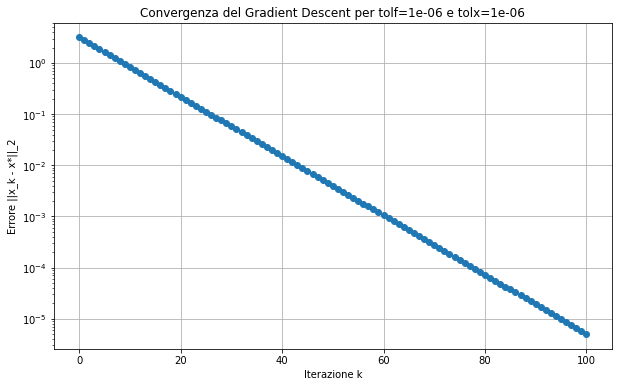

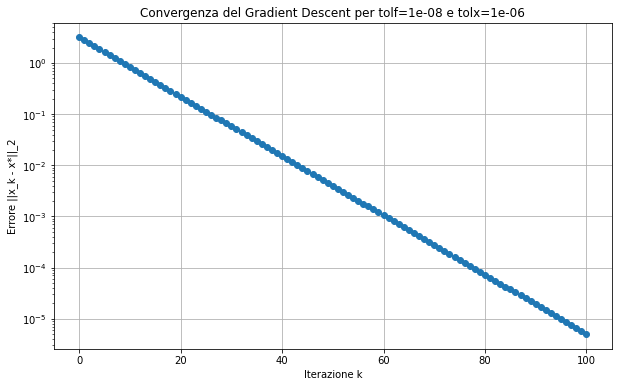

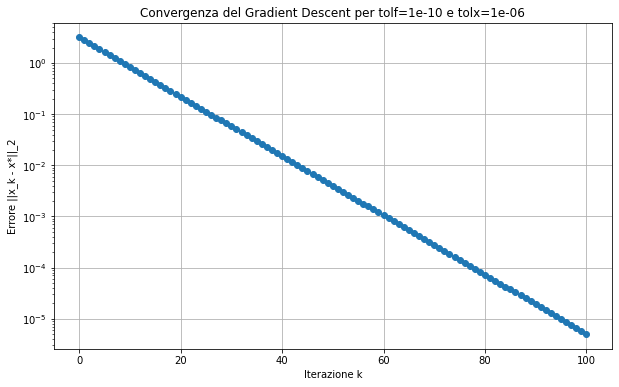

In [17]:
x_star = np.array([3, 1])

def find_optimal_tolerances_backtracking(f,grad_f,x0,kmax,tolf_values,tolx_values):
    res = {}
    for tolf in tolf_values:
        for tolx in tolx_values:
            x,k_iter,f_val,_,_ = gradient_descent(f, grad_f, x0, kmax, tolf, tolx)

            errors = [np.linalg.norm(x_k - x_star) for x_k in x]

            final_f_val = f_val[-1]
            last_x_change = x[-1] - x[-2]
            res[(tolf,tolx)] = (k_iter,final_f_val,last_x_change,errors)

    return res

x0 = np.array([0.0, 0.0])
kmax = 100
tolf_values = [1e-6, 1e-8, 1e-10]
tolx_values = [1e-6, 1e-8, 1e-10]


optimal_tolerances = find_optimal_tolerances_backtracking(f, grad_f, x0, kmax, tolf_values, tolx_values)

for tol_values, info in optimal_tolerances.items():
    print(f"tolf: {tol_values[0]}, tolx: {tol_values[1]} -> Iterazioni: {info[0]}, Valore finale: {info[1]}, Cambiamento in x: {np.linalg.norm(info[2])}")


##############

tolf_to_plot = 1e-6
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  # Usa scala logaritmica se ci sono cambiamenti di ordine di grandezza
plt.xlabel('Iterazione k')
plt.ylabel('Errore ||x_k - x*||_2')
plt.title(f'Convergenza del Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()

###############

tolf_to_plot = 1e-8
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  # Usa scala logaritmica se ci sono cambiamenti di ordine di grandezza
plt.xlabel('Iterazione k')
plt.ylabel('Errore ||x_k - x*||_2')
plt.title(f'Convergenza del Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()

################

tolf_to_plot = 1e-10
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  # Usa scala logaritmica se ci sono cambiamenti di ordine di grandezza
plt.xlabel('Iterazione k')
plt.ylabel('Errore ||x_k - x*||_2')
plt.title(f'Convergenza del Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()


In conducting an analysis of the gradient descent algorithm's performance with varying tolerances for the objective function (<b>tolf</b>) and decision variables (<b>tolx</b>), it was observed that the convergence of the algorithm is predominantly influenced by the tolerance on the objective function (tolf). 

Specifically, as tolf is tightened (lowered from 1e−6 to 1e−10), the precision of the solution notably increases, as evidenced by a significant reduction in the final objective function value. 
However, this increase in precision comes with a corresponding rise in the number of iterations, highlighting a classic trade-off between computational cost and solution accuracy. 

Notably, changes in tolx did not materially affect the number of iterations or the final value of the objective function, suggesting that the convergence criterion based on the gradient norm (tolf) is the primary determinant in the stopping condition of the algorithm under the tested scenarios.

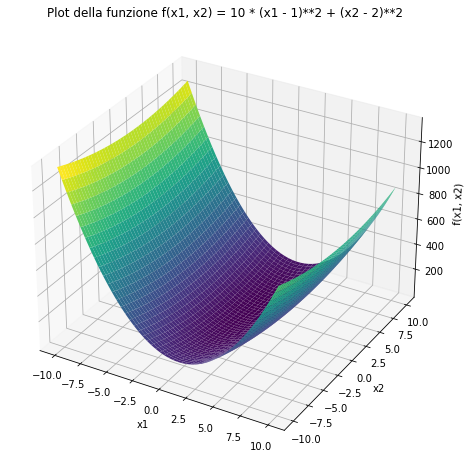

In [18]:
###############################################################
# 2 Function
def f2(x):
    x1,x2 = x
    return 10 * (x1 - 1)**2 + (x2 - 2)**2

def grad_f2(x):
    x1,x2 = x
    return np.array([20 * (x1 - 1),2 * (x2 - 2)])


x1 = np.linspace(-10,10,400)
x2 = np.linspace(-10,10,400)
x1,x2 = np.meshgrid(x1,x2)
x = [x1,x2]
z = f2(x)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Plot della funzione f(x1, x2) = 10 * (x1 - 1)**2 + (x2 - 2)**2')
plt.show()


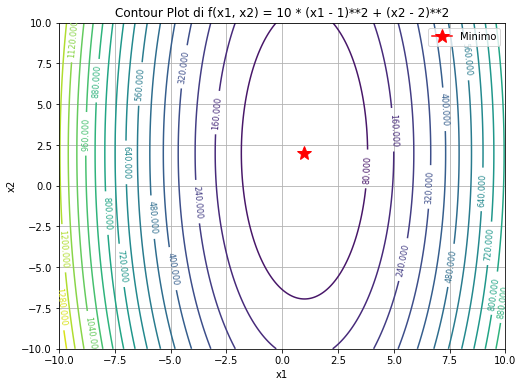

In [19]:
plt.figure(figsize=(8, 6))
contours = plt.contour(x1, x2, z, 20, cmap='viridis')  # 20 contours levels
plt.clabel(contours,fontsize=8)

# Etichette e titolo
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot di f(x1, x2) = 10 * (x1 - 1)**2 + (x2 - 2)**2')
plt.grid(True)

min_x1 = 1
min_x2 = 2
plt.plot(min_x1, min_x2, marker='*', color='red', markersize=15, label='Minimo')
plt.legend()


plt.show()

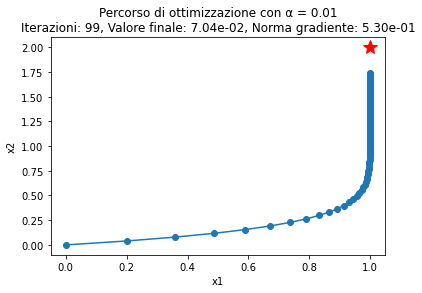

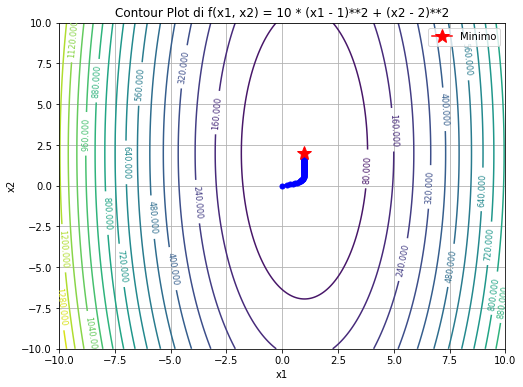

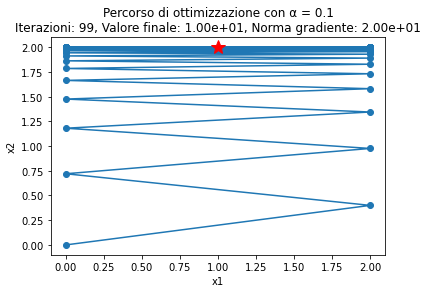

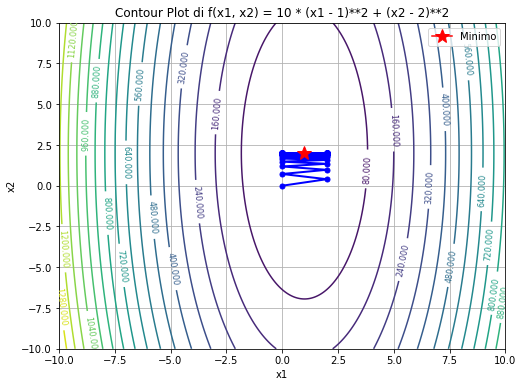

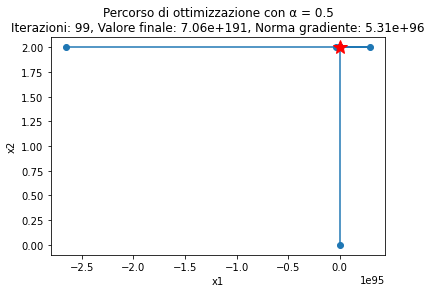

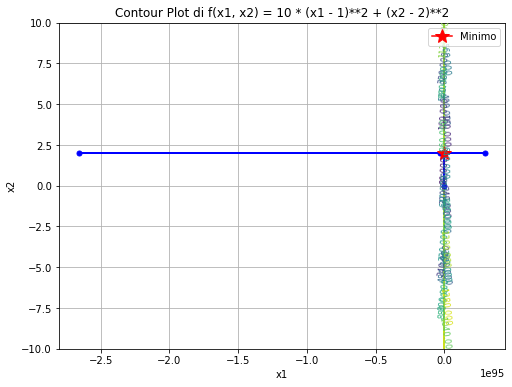

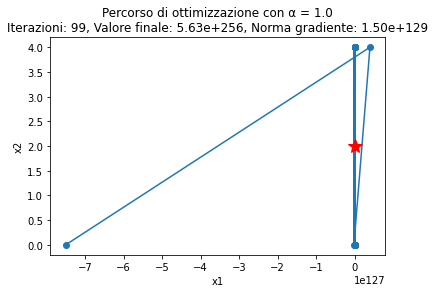

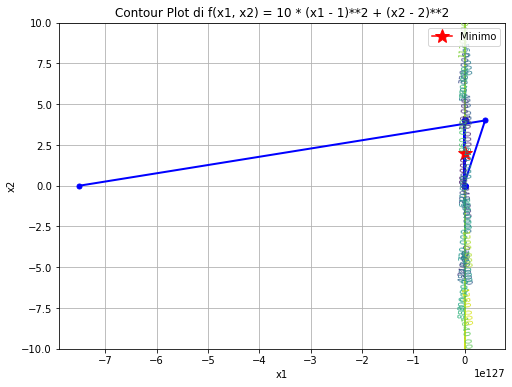

In [20]:
x0 = np.array([0.0, 0.0])  # Punto iniziale
kmax = 100  # Numero massimo di iterazioni
tolf = 1e-6  # Tolleranza sul gradiente
tolx = 1e-6  # Tolleranza sulla posizione
alphas = [0.01, 0.1, 0.5, 1.0]  # Some alpha values to test

minimo_x1 = 1
minimo_x2 = 2

results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(f2, grad_f2, x0, kmax, tolf, tolx, alpha)

# print(results_nobacktracking)


def plot_optimization_path(x_history, title, num_iterations, final_func_value, final_grad_norm):
    x_vals = [x[0] for x in x_history]
    y_vals = [x[1] for x in x_history]

    plt.plot(x_vals, y_vals, marker='o')
    plt.plot(1, 2, 'r*', markersize=15)  # Punto ottimale
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"{title}\nIterazioni: {num_iterations}, Valore finale: {final_func_value:.2e}, Norma gradiente: {final_grad_norm:.2e}")

    plt.figure(figsize=(8, 6))
    contours = plt.contour(x1, x2, z, 20, cmap='viridis')  # 20 contours levels
    plt.clabel(contours,fontsize=8)

    x1_path = [x[0] for x in path]
    x2_path = [x[1] for x in path]

    plt.plot(x1_path,x2_path,marker='o',color='blue',linestyle='-',linewidth=2, markersize=5)

   
    # Etichette e titolo
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot di f(x1, x2) = 10 * (x1 - 1)**2 + (x2 - 2)**2')
    plt.grid(True)
    plt.plot(minimo_x1, minimo_x2, marker='*', color='red', markersize=15, label='Minimo')
    plt.legend()

    plt.show()


for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    final_point = path[-1]
    final_func_value = f_val[-1]
    final_grad_norm = np.linalg.norm(grads[-1])
    plot_optimization_path(path, f"Percorso di ottimizzazione con α = {alpha}", num_iterations, final_func_value, final_grad_norm)

    

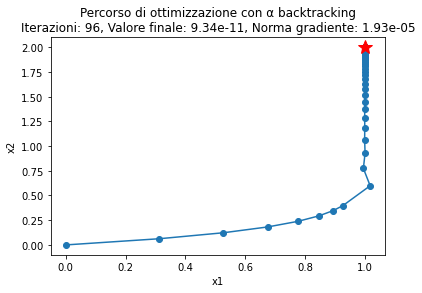

In [21]:
x0 = np.array([0.0, 0.0])  # Punto iniziale
kmax = 100  # Numero massimo di iterazioni
tolf = 1e-6  # Tolleranza sul gradiente
tolx = 1e-6  # Tolleranza sulla posizione

path, num_iterations, f_val, grads, err = gradient_descent(f2, grad_f2, x0, kmax, tolf, tolx)

#print(results_backtracking)


def plot_optimization_path(x_history, title, num_iterations, final_func_value, final_grad_norm):
    x_vals = [x[0] for x in x_history]
    y_vals = [x[1] for x in x_history]

    plt.plot(x_vals, y_vals, marker='o')
    plt.plot(1, 2, 'r*', markersize=15)  # Punto ottimale
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"{title}\nIterazioni: {num_iterations}, Valore finale: {final_func_value:.2e}, Norma gradiente: {final_grad_norm:.2e}")
    plt.show()


final_point = path[-1]
final_func_value = f_val[-1]
final_grad_norm = np.linalg.norm(grads[-1])
plot_optimization_path(path, f"Percorso di ottimizzazione con α backtracking", num_iterations, final_func_value, final_grad_norm)

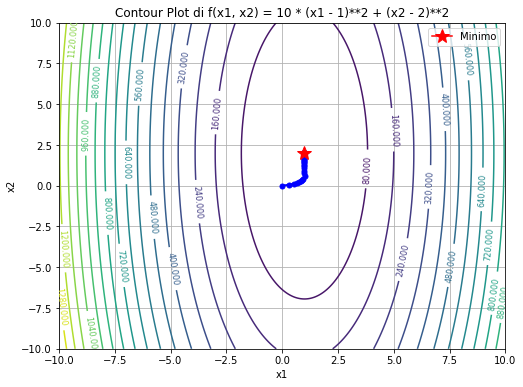

In [22]:
plt.figure(figsize=(8, 6))
contours = plt.contour(x1, x2, z, 20, cmap='viridis')  # 20 contours levels
plt.clabel(contours,fontsize=8)

x_vals = [x[0] for x in path]
y_vals = [x[1] for x in path]

plt.plot(x_vals,y_vals,marker='o',color='blue',linestyle='-',linewidth=2, markersize=5)


# Etichette e titolo
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot di f(x1, x2) = 10 * (x1 - 1)**2 + (x2 - 2)**2')
plt.grid(True)

minimo_x1 = 1
minimo_x2 = 2
plt.plot(minimo_x1, minimo_x2, marker='*', color='red', markersize=15, label='Minimo')
plt.legend()


plt.show()


<ipython-input-23-c3c214a6fa1a>:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1e10)  # delete this line to see the general effect


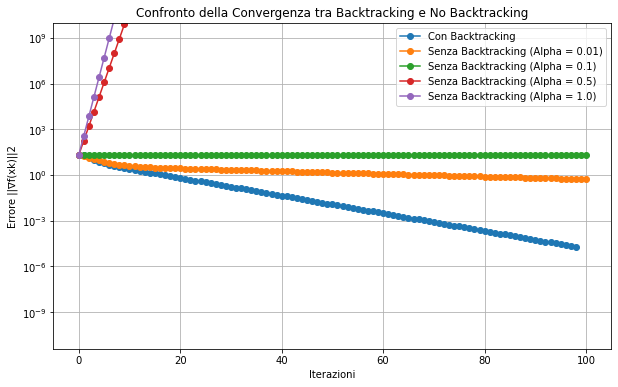

In [23]:
# Estrai i dati dai risultati con backtracking
path, num_iterations, f_val, grads, err = gradient_descent(f2, grad_f2, x0, kmax, tolf, tolx)
k_backtracking = num_iterations
err_backtracking = err


# Estrai i dati dai risultati senza backtracking
k_nobacktracking = [results_nobacktracking[alpha][1] for alpha in alphas]
err_nobacktracking = [results_nobacktracking[alpha][-1] for alpha in alphas]

# Plotta l'errore in funzione delle iterazioni per entrambi i casi
plt.figure(figsize=(10, 6))
plt.semilogy(range(1,k_backtracking+3), err_backtracking, label='Con Backtracking', marker='o')
for alpha, error in zip(alphas, err_nobacktracking):
    plt.semilogy(range(len(error)), error, label=f'Senza Backtracking (Alpha = {alpha})', marker='o')

plt.ylim(0, 1e10)  # delete this line to see the general effect 

plt.xlabel('Iterazioni')
plt.ylabel('Errore ||∇f(xk)||2')
plt.title('Confronto della Convergenza tra Backtracking e No Backtracking')
plt.legend()
plt.grid()
plt.show()

tolf: 1e-06, tolx: 1e-06 -> Iterazioni: 96, Valore finale: 9.342724716663181e-11, Cambiamento in x: 1.3808253016556193e-06
tolf: 1e-06, tolx: 1e-08 -> Iterazioni: 96, Valore finale: 9.342724716663181e-11, Cambiamento in x: 1.3808253016556193e-06
tolf: 1e-06, tolx: 1e-10 -> Iterazioni: 96, Valore finale: 9.342724716663181e-11, Cambiamento in x: 1.3808253016556193e-06
tolf: 1e-08, tolx: 1e-06 -> Iterazioni: 99, Valore finale: 4.1929711155505456e-11, Cambiamento in x: 9.250450752062989e-07
tolf: 1e-08, tolx: 1e-08 -> Iterazioni: 99, Valore finale: 4.1929711155505456e-11, Cambiamento in x: 9.250450752062989e-07
tolf: 1e-08, tolx: 1e-10 -> Iterazioni: 99, Valore finale: 4.1929711155505456e-11, Cambiamento in x: 9.250450752062989e-07
tolf: 1e-10, tolx: 1e-06 -> Iterazioni: 99, Valore finale: 4.1929711155505456e-11, Cambiamento in x: 9.250450752062989e-07
tolf: 1e-10, tolx: 1e-08 -> Iterazioni: 99, Valore finale: 4.1929711155505456e-11, Cambiamento in x: 9.250450752062989e-07
tolf: 1e-10, tol

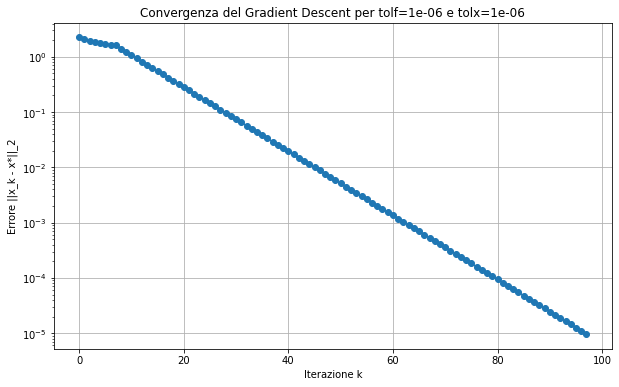

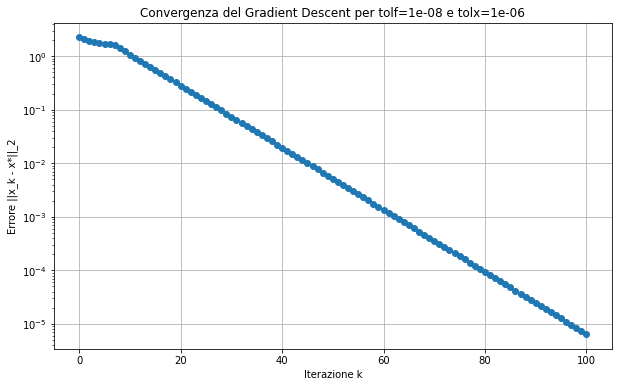

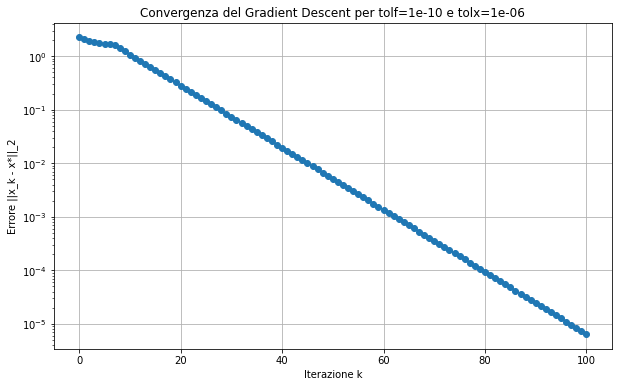

In [24]:
x_star = np.array([1, 2])


x0 = np.array([0.0, 0.0])
kmax = 100
tolf_values = [1e-6, 1e-8, 1e-10]
tolx_values = [1e-6, 1e-8, 1e-10]


optimal_tolerances = find_optimal_tolerances_backtracking(f2, grad_f2, x0, kmax, tolf_values, tolx_values)

for tol_values, info in optimal_tolerances.items():
    print(f"tolf: {tol_values[0]}, tolx: {tol_values[1]} -> Iterazioni: {info[0]}, Valore finale: {info[1]}, Cambiamento in x: {np.linalg.norm(info[2])}")


##############

tolf_to_plot = 1e-6
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  # Usa scala logaritmica se ci sono cambiamenti di ordine di grandezza
plt.xlabel('Iterazione k')
plt.ylabel('Errore ||x_k - x*||_2')
plt.title(f'Convergenza del Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()

###############

tolf_to_plot = 1e-8
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  # Usa scala logaritmica se ci sono cambiamenti di ordine di grandezza
plt.xlabel('Iterazione k')
plt.ylabel('Errore ||x_k - x*||_2')
plt.title(f'Convergenza del Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()

################

tolf_to_plot = 1e-10
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  # Usa scala logaritmica se ci sono cambiamenti di ordine di grandezza
plt.xlabel('Iterazione k')
plt.ylabel('Errore ||x_k - x*||_2')
plt.title(f'Convergenza del Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()

In [25]:
def generate_vandermonde_matrix(n):
    v = np.linspace(0, 1, n)
    return np.vander(v, n, increasing=True)

n = 5
A = generate_vandermonde_matrix(n)
x_true = np.ones(n)
b = A @ x_true

def f3(x):
    return 0.5 * np.linalg.norm(A @ x - b) ** 2

def grad_f3(x):
    return A.T @ (A @ x - b)




# Dimensione della matrice di Vandermonde e vettore x_true
# n = 5
# A = generate_vandermonde_matrix(n)
# x_true = np.ones(n)
# b = A @ x_true

# # Creazione della griglia 2D per il plot
# x1 = np.linspace(-1, 5, 400)
# x2 = np.linspace(-1, 3, 400)
# X1, X2 = np.meshgrid(x1, x2)

# # Calcolo di Z per ogni punto (x1, x2) sulla griglia
# Z = np.zeros(X1.shape)

# for i in range(X1.shape[0]):
#     for j in range(X1.shape[1]):
#         # Costruisci il vettore di parametri x dalla griglia
#         x = np.array([X1[i, j], X2[i, j]]).reshape(-1, 1)
#         # Estendi x per abbinare le dimensioni di A
#         x_extended = np.vstack((x, np.ones((n - 2, 1))))
#         # Calcola il valore della funzione
#         Z[i, j] = f3(x_extended, A, b)

# # Plot 3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)

# # Labels e titolo
# ax.set_xlabel('x1')
# ax.set_ylabel('x2')
# ax.set_zlabel('f(x)')
# ax.set_title('3D Plot della funzione')

# plt.show()


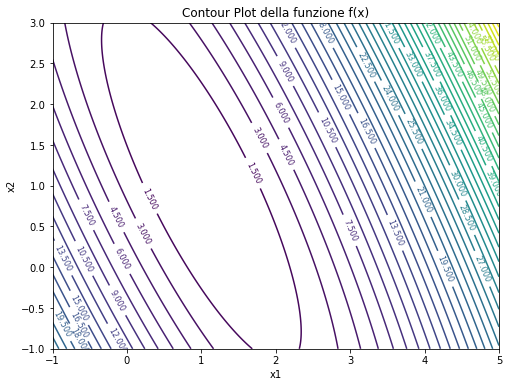

In [26]:
n = 5
A = generate_vandermonde_matrix(n)
x_true = np.ones(n)
b = A @ x_true

# Fissa le altre dimensioni a valori costanti
fixed_values = np.ones(n - 2)

# Griglia 2D per le prime due variabili
x1 = np.linspace(-1, 5, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)

# Calcolo di Z per ogni punto (x1, x2) sulla griglia
Z = np.zeros(X1.shape)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j], *fixed_values])
        Z[i, j] = f3(x)

# Plot delle linee di contorno
plt.figure(figsize=(8, 6))
contours = plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot della funzione f(x)')
plt.show()

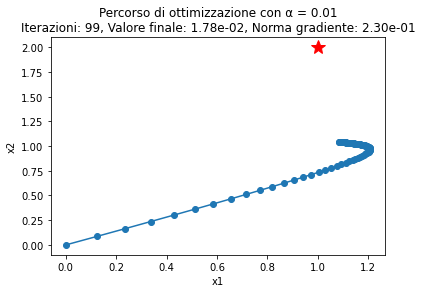

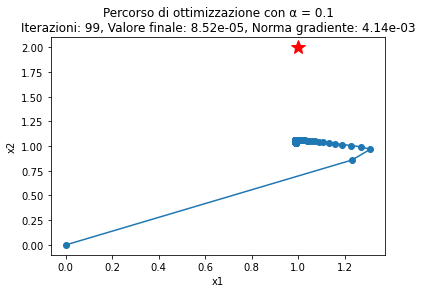

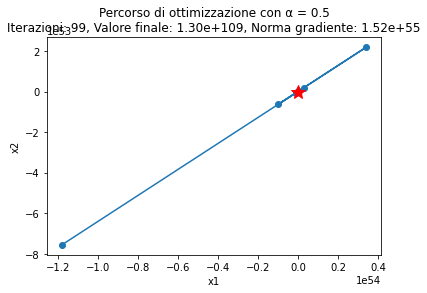

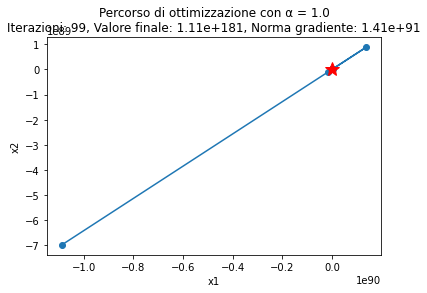

In [27]:
x0 = np.zeros(n)  # Punto iniziale per n=5
kmax = 100  # Numero massimo di iterazioni
tolf = 1e-6  # Tolleranza sul gradiente
tolx = 1e-6  # Tolleranza sulla posizione
alphas = [0.01, 0.1, 0.5, 1.0]  # Some alpha values to test



results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(f3, grad_f3, x0, kmax, tolf, tolx, alpha)

# print(results_nobacktracking)



for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    final_point = path[-1]
    final_func_value = f_val[-1]
    final_grad_norm = np.linalg.norm(grads[-1])
    plot_optimization_path(path, f"Percorso di ottimizzazione con α = {alpha}", num_iterations, final_func_value, final_grad_norm)


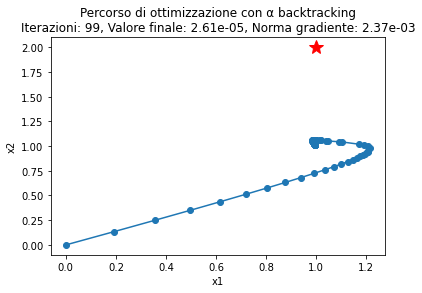

In [28]:
x0 = np.zeros(n)  # Punto iniziale per n=5
kmax = 100  # Numero massimo di iterazioni
tolf = 1e-6  # Tolleranza sul gradiente
tolx = 1e-6  # Tolleranza sulla posizione
path, num_iterations, f_val, grads, err = gradient_descent(f3, grad_f3, x0, kmax, tolf, tolx)

#print(results_backtracking)


def plot_optimization_path(x_history, title, num_iterations, final_func_value, final_grad_norm):
    x_vals = [x[0] for x in x_history]
    y_vals = [x[1] for x in x_history]

    plt.plot(x_vals, y_vals, marker='o')
    plt.plot(1, 2, 'r*', markersize=15)  # Punto ottimale
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"{title}\nIterazioni: {num_iterations}, Valore finale: {final_func_value:.2e}, Norma gradiente: {final_grad_norm:.2e}")
    plt.show()


final_point = path[-1]
final_func_value = f_val[-1]
final_grad_norm = np.linalg.norm(grads[-1])
plot_optimization_path(path, f"Percorso di ottimizzazione con α backtracking", num_iterations, final_func_value, final_grad_norm)

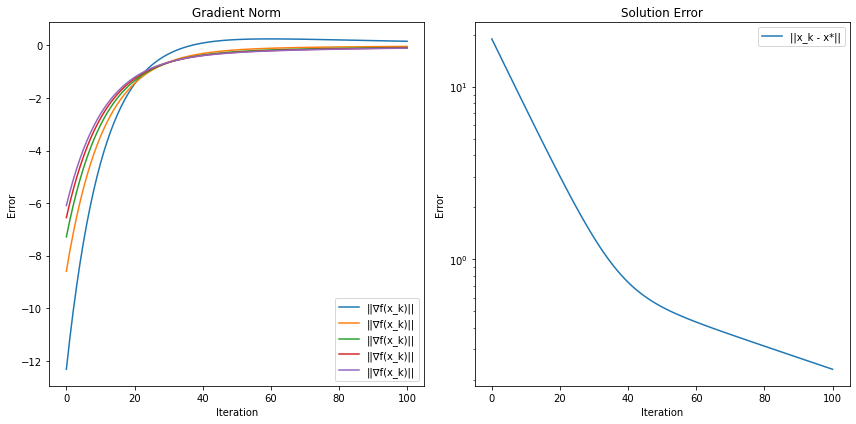

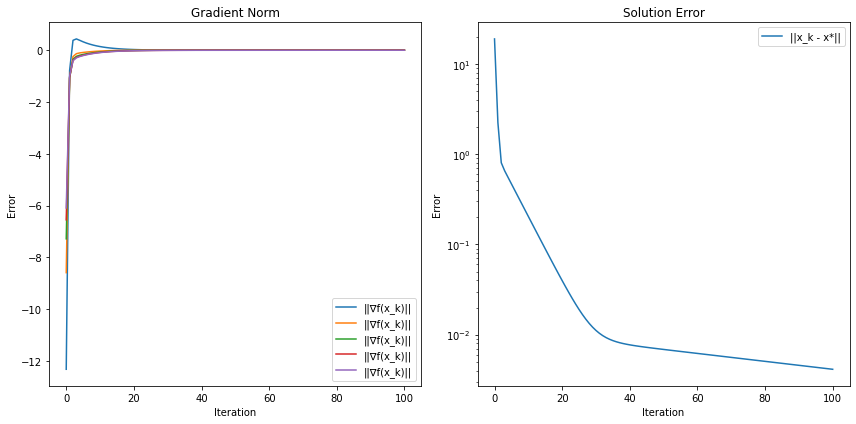

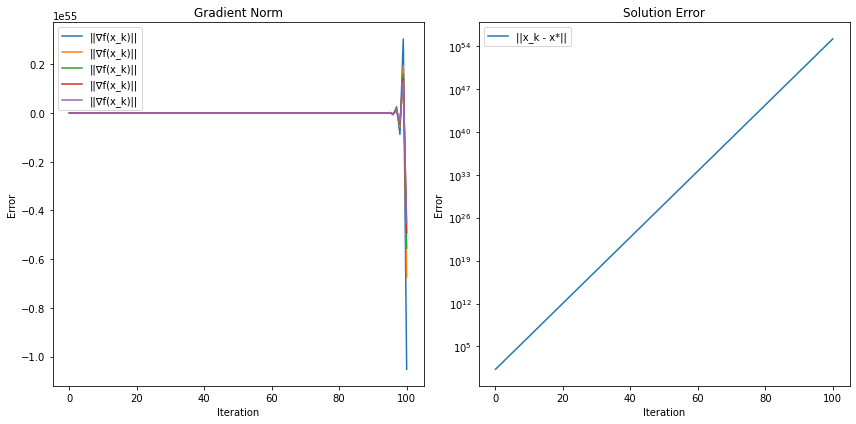

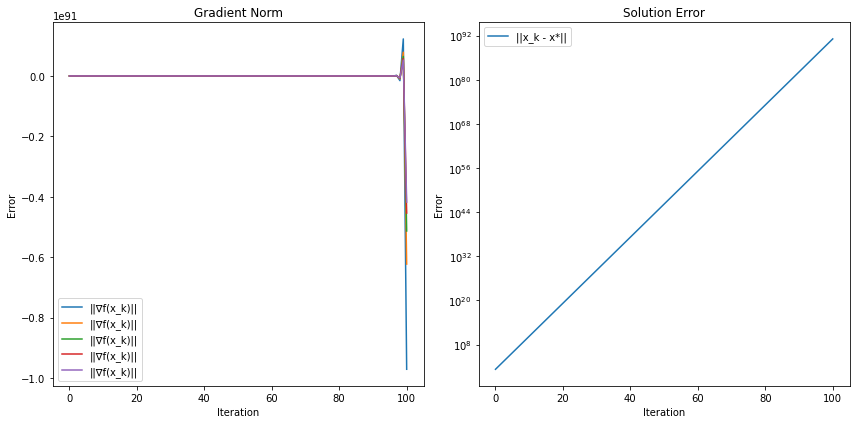

In [29]:
x0 = np.zeros(n)  # Punto iniziale per n=5
kmax = 100  # Numero massimo di iterazioni
tolf = 1e-6  # Tolleranza sul gradiente
tolx = 1e-6  # Tolleranza sulla posizione
alphas = [0.01, 0.1, 0.5, 1.0]  # Some alpha values to test
A = generate_vandermonde_matrix(n)
x_true = np.ones(n)  # The true minimum for visualization purposes
b = A @ x_true


results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(f3, grad_f3, x0, kmax, tolf, tolx, alpha)

# print(results_nobacktracking)
# Plot the gradient norm and the solution error
for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(grads, label='||∇f(x_k)||')
    plt.title('Gradient Norm')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.semilogy(err, label='||x_k - x*||')
    plt.title('Solution Error')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.legend()

    plt.tight_layout()
    plt.show()

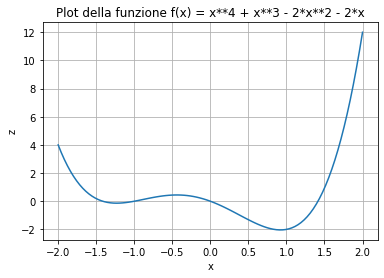

In [30]:
# 5 function 
x = np.linspace(-2, 2, 100)
z = x**4 + x**3 - 2*x**2 - 2*x

plt.plot(x,z)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Plot della funzione f(x) = x**4 + x**3 - 2*x**2 - 2*x')
plt.grid()
plt.show()

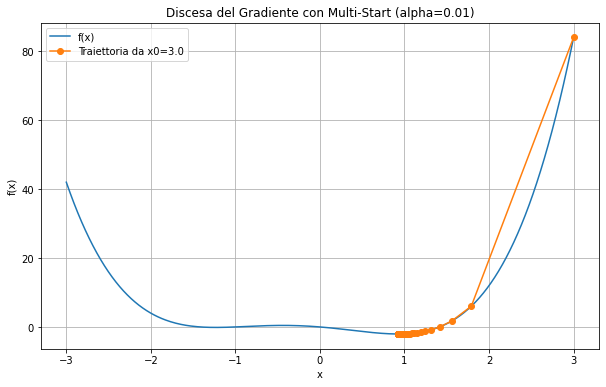

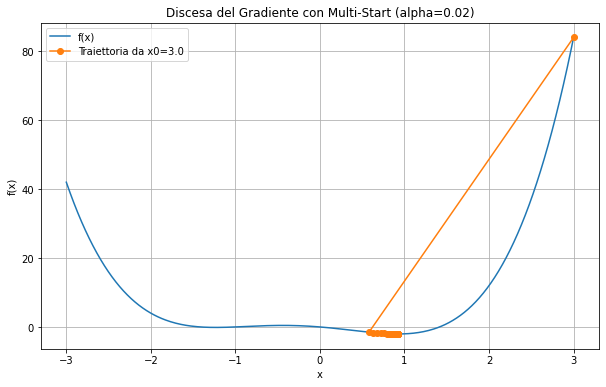

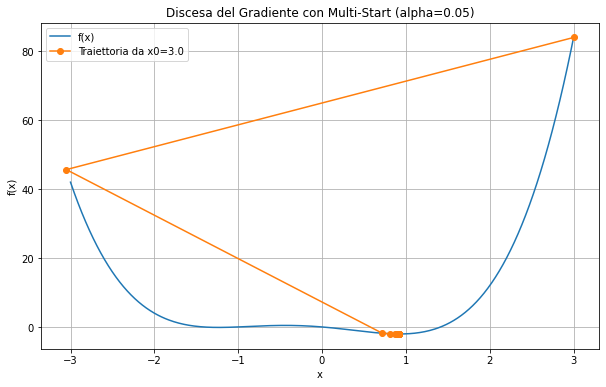

<ipython-input-34-3c062d039a5b>:5: RuntimeWarning: overflow encountered in double_scalars
  return 4*x**3 + 3*x**2 - 4*x - 2
<ipython-input-34-3c062d039a5b>:5: RuntimeWarning: invalid value encountered in double_scalars
  return 4*x**3 + 3*x**2 - 4*x - 2
<ipython-input-34-3c062d039a5b>:2: RuntimeWarning: overflow encountered in double_scalars
  return x**4 + x**3 - 2*x**2 - 2*x
<ipython-input-34-3c062d039a5b>:2: RuntimeWarning: invalid value encountered in double_scalars
  return x**4 + x**3 - 2*x**2 - 2*x


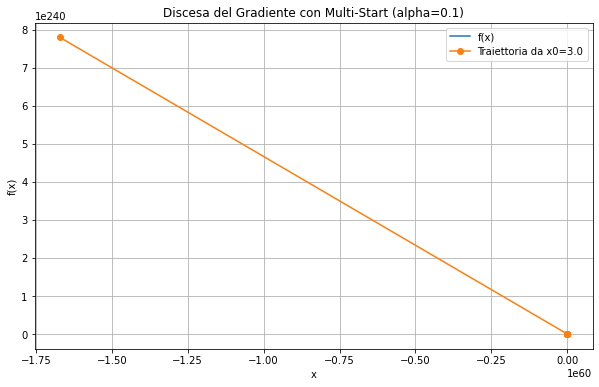

In [34]:
def f5(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f5(x):
    return 4*x**3 + 3*x**2 - 4*x - 2

def gradient_descent(f, grad_f, x0, alpha, max_iters, tol):
    x = x0
    trajectory = [x]
    for i in range(max_iters):
        grad = grad_f(x)
        x = x - alpha * grad
        trajectory.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return x, f(x), trajectory

max_iters = 10000
tol = 1e-6
alphas = [0.01, 0.02, 0.05, 0.1]  

starting_points = np.linspace(-3, 3, 20) 

x_vals = np.linspace(-3, 3, 400)
y_vals = f5(x_vals)

for alpha in alphas:
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Discesa del Gradiente con Multi-Start (alpha={alpha})')
    plt.grid(True)
    
    for x0 in starting_points:
        min_x, min_f, trajectory = gradient_descent(f5, grad_f5, x0, alpha, max_iters, tol)
        
    plt.plot(trajectory, [f5(x) for x in trajectory], 'o-', label=f'Traiettoria da x0={x0}')
    plt.legend()
    plt.show()
    


<ipython-input-34-3c062d039a5b>:5: RuntimeWarning: overflow encountered in double_scalars
  return 4*x**3 + 3*x**2 - 4*x - 2
<ipython-input-34-3c062d039a5b>:5: RuntimeWarning: invalid value encountered in double_scalars
  return 4*x**3 + 3*x**2 - 4*x - 2


Il minimo globale trovato è a x = 0.9222247959397557 con un valore di funzione di -2.037748041495885


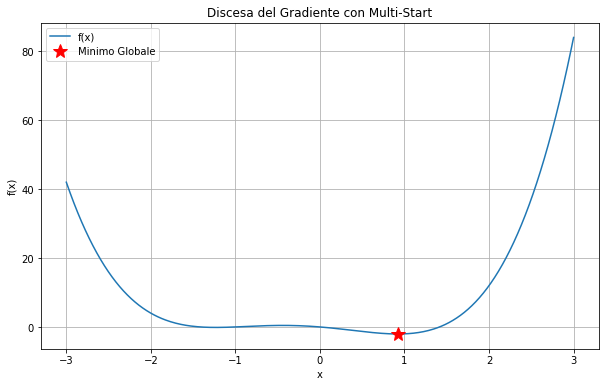

In [45]:
def gradient_descent_one(f, grad_f, x0, alpha, max_iters, tol):
    x = x0
    trajectory = [x]
    for i in range(max_iters):
        grad = grad_f(x)
        x = x - alpha * grad
        trajectory.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return x, f(x), trajectory

max_iters = 10000
tol = 1e-6
alphas = [0.01, 0.02, 0.05, 0.1]  

starting_points = np.linspace(-3, 3, 20) 
all_min = []

for alpha in alphas:
    for x0 in starting_points:
        min_x, min_f, _ = gradient_descent_one(f5, grad_f5, x0, alpha, max_iters, tol)
        all_min.append((min_x, min_f))

global_minimum = min(all_min, key=lambda x: x[1])

print(f"Il minimo globale trovato è a x = {global_minimum[0]} con un valore di funzione di {global_minimum[1]}")

x_vals = np.linspace(-3, 3, 400)
y_vals = f5(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)')
plt.plot(global_minimum[0], global_minimum[1], 'r*', markersize=15, label='Minimo Globale')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Discesa del Gradiente con Multi-Start')
plt.legend()
plt.grid(True)
plt.show()



In [48]:
def multi_start_gradient_descent(f, grad_f,alpha, x0s, kmax, tol):
    best_x = None
    best_f_val = float('inf')
    best_grads = None
    best_err = None
    best_iter = kmax
    
    for x0 in x0s:
        xs, iters, f_vals, grads, errs = gradient_descent_one(f5, grad_f5,alpha, x0, kmax, tol)
        
        if f_vals[-1] < best_f_val:
            best_x = xs[-1]
            best_f_val = f_vals[-1]
            best_grads = grads[-1]
            best_err = errs[-1]
            best_iter = iters
    
    return best_x, best_iter, best_f_val, best_grads, best_err

x0s = [np.random.uniform(-3, 3) for i in range(10)]  
kmax = 1000
tol = 1e-6
alpha = 0.05

best_x, best_iter, best_f_val, best_grads, best_err = multi_start_gradient_descent(f5, grad_f5,alpha, x0s, kmax, tol)

print(f"Il miglior minimo trovato è in x = {best_x} con un valore di funzione di {best_f_val}")


OverflowError: (34, 'Result too large')